In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

In [2]:
infile_qcd = open('qcd_100000_pt_250_500.pkl','rb')
infile_higgs = open('higgs_100000_pt_250_500.pkl','rb')

d_qcd = pickle.load(infile_qcd)
d_higgs = pickle.load(infile_higgs)

The LHC dataset contains simulated proton-proton collisions that model real data taken at the Large Hadron Collider. This dataset contains a background of 100,000 QCD jets i.e. quark and gluon (parton) jets. The second dataset contains our signal, 100,000 entries of simulated Higgs producing collisions. The goal of this study is to evaluate both datasets to better understand how to optimize data selection to assist in discovery sensitivity. Information provided here comes either from prior knowledge, easily google-able information, or papers linked.

Each set of data contains 14 features:

In [3]:
print(d_qcd.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


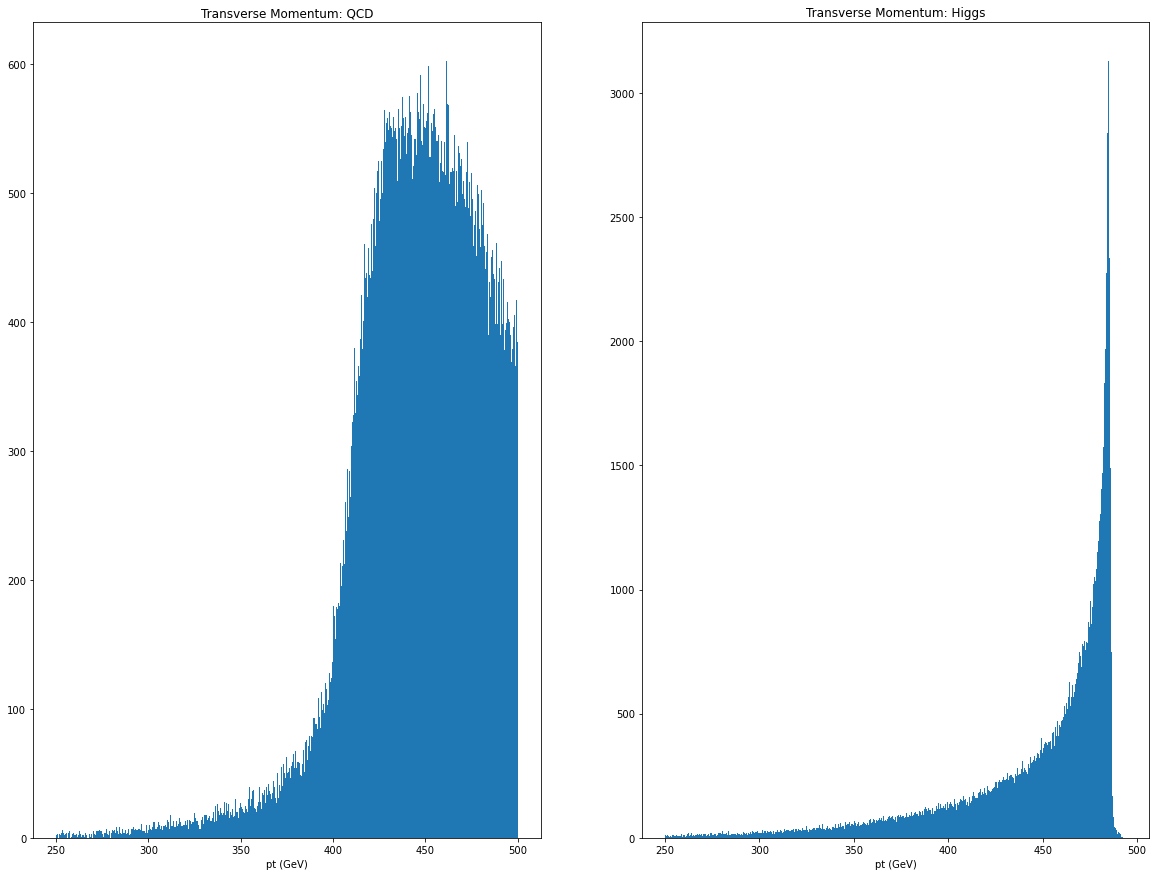

In [4]:
plt.rcParams['figure.figsize'] = (20,15)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['pt'], 500)
ax2.hist(d_higgs['pt'],500)
ax1.set_title('Transverse Momentum: QCD')
ax2.set_title('Transverse Momentum: Higgs')
ax1.set_xlabel('pt (GeV)')
ax2.set_xlabel('pt (GeV)')
plt.show()

The transverse momentum is a measure of a jet's momentum perpindicular to the beam of protons the jet originated from. The transverse momentum is momentum directly related to the collision at the vertex, and higher pt generally indicates harder collisions involving heavier particles. Unfortunately, the expected value of pt for the higgs lies within a large portion of the background pt, so without cuts made using other features that are correlated to high pt, its unlikely that this will be a useful metric for improving discovery sensitivity.

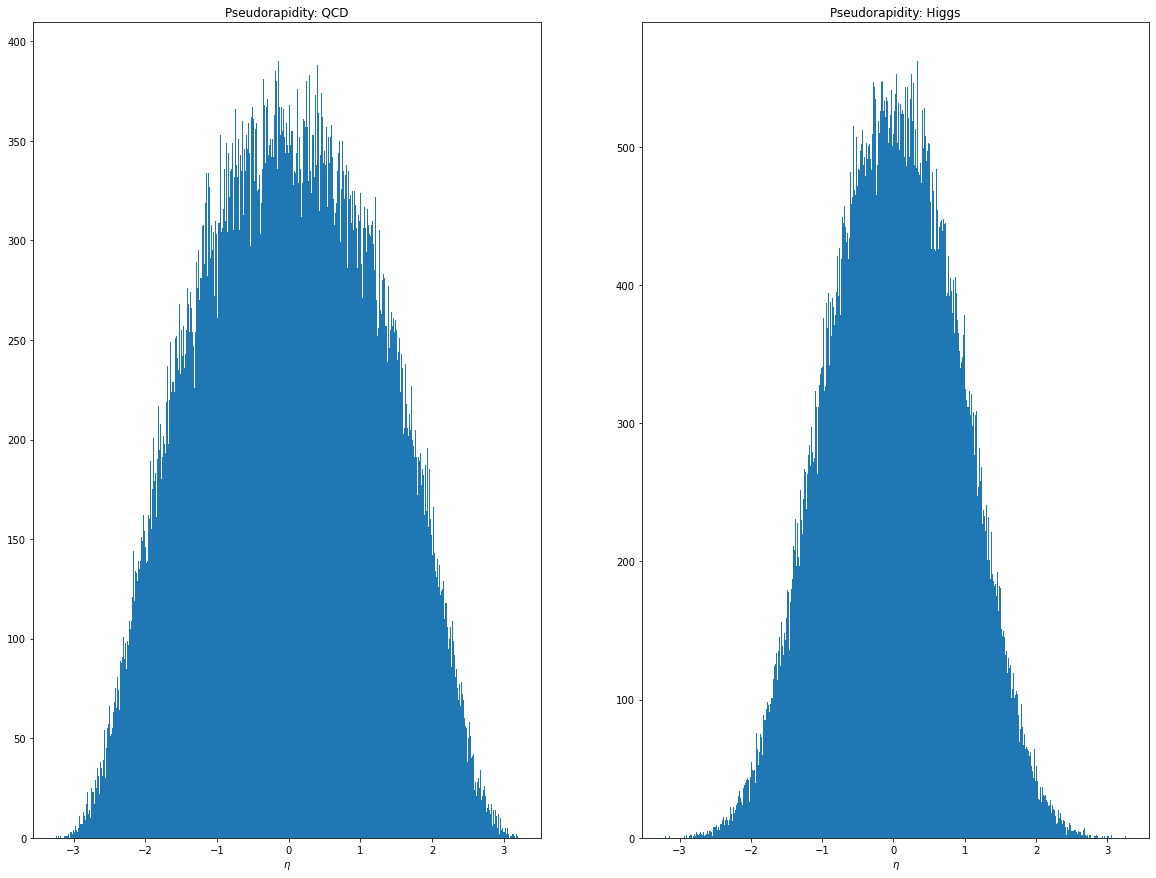

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['eta'], 500)
ax2.hist(d_higgs['eta'],500)
ax1.set_title('Pseudorapidity: QCD')
ax2.set_title('Pseudorapidity: Higgs')
ax1.set_xlabel('$\eta$')
ax2.set_xlabel('$\eta$')
plt.show()

Pseudorapidity ($\eta$) is a measure of the direction of the jet relative to the beam axis. A value of 0 indicates the jet is perpindicular to the beam, while higher values indicate the direction of the jet is more parallel with the beam axis: 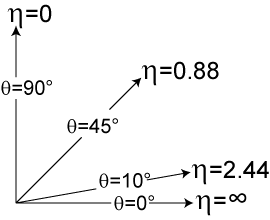

The pseudorapidity of these datasets is gaussian in nature centered about zero, with a slightly wider distribution for the QCD set, indicating that the majority of jets deflect perpindicular, or close to perpindicular from the beam axis. Despite the slight difference in variance, this is likely not the best metric to classify signal from background as there is not a significant enough difference between signal and background, and all values of higgs pseudorapidity lie within the possibly values of QCD pseudorapidity.

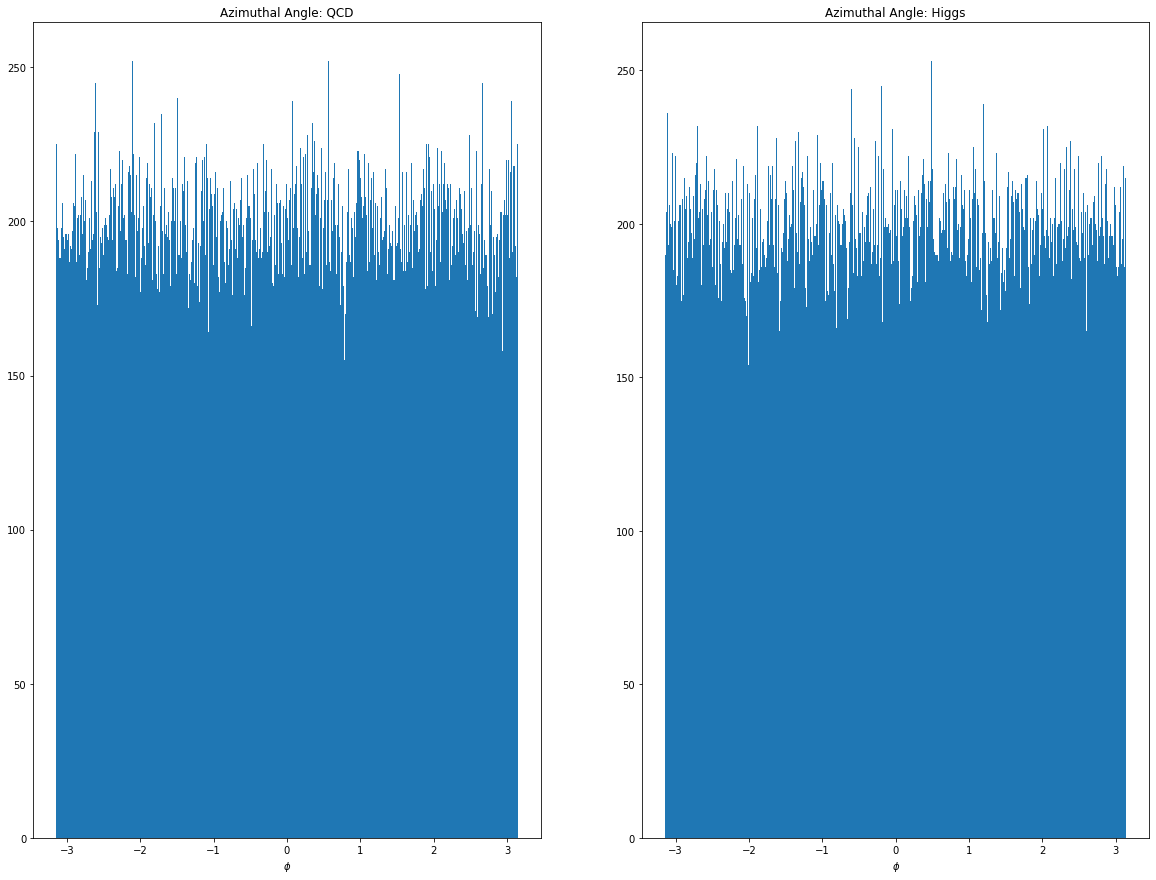

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['phi'], 500)
ax2.hist(d_higgs['phi'],500)
ax1.set_title('Azimuthal Angle: QCD')
ax2.set_title('Azimuthal Angle: Higgs')
ax1.set_xlabel('$\phi$')
ax2.set_xlabel('$\phi$')
plt.show()

The azimuthal angle is a measure of the angle of direction of the jet about the beam axis from [-$\pi$,$\pi$]. The plots above indicate that the produced jets are sent radially outward in all directions away from the axis, again mostly perpindicular from this axis.

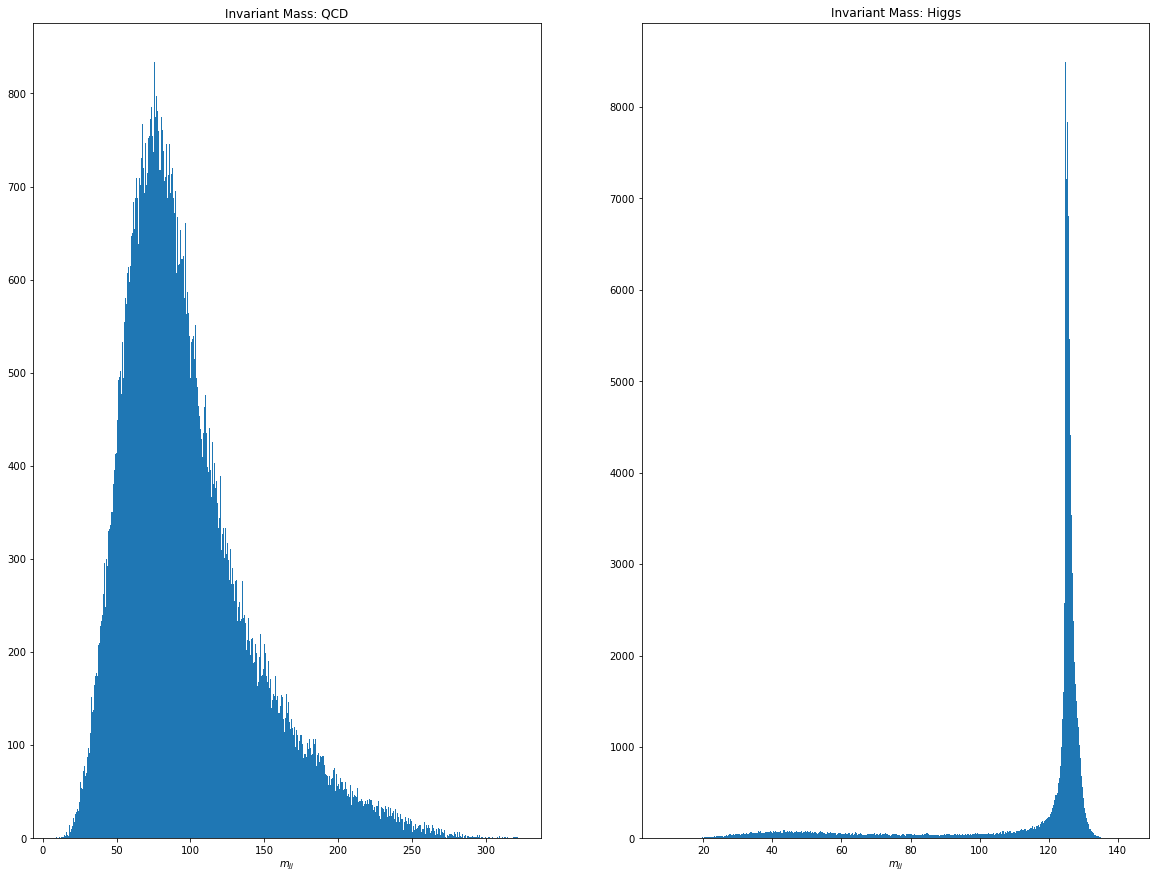

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['mass'], 500)
ax2.hist(d_higgs['mass'],500)
ax1.set_title('Invariant Mass: QCD')
ax2.set_title('Invariant Mass: Higgs')
ax1.set_xlabel('$m_{jj}$')
ax2.set_xlabel('$m_{jj}$')
plt.show()

The invariant mass of a particle is a measure of that particle's mass (in GeV) constant in all reference frames, or the mass of the jet in the center-of-momentum frame. The Higgs dataset tends to heavily favor an invariant mass of close to 125 GeV, which coincides with the accepted value of the mass of a Higgs boson, whereas the QCD set follows a more probablistic distribution resembling a rayleigh distribution. Since this will likely be a useful feature as this would be an easy way to distinguish signal from background, let's use the current statistical significance of a signal at 125 GeV as a baseline.

62.22196938558798


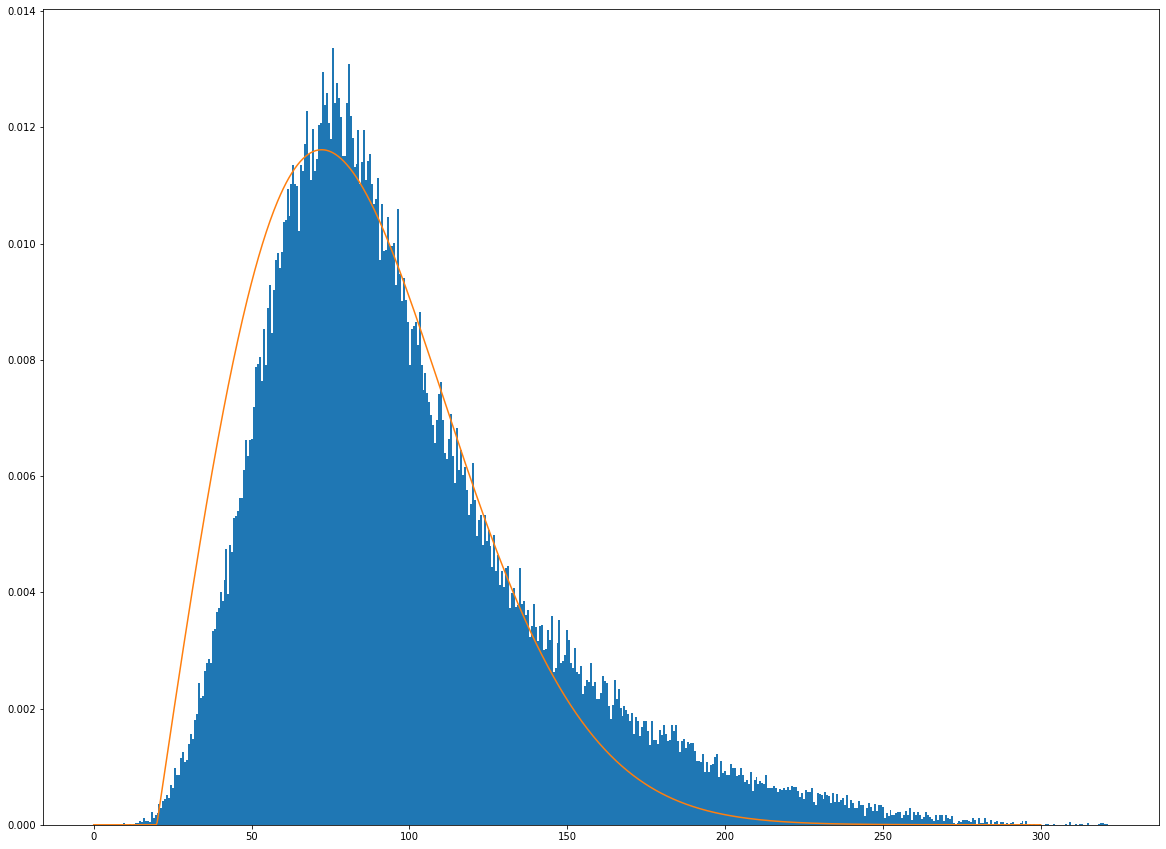

In [53]:
mean = np.mean(d_qcd['mass'])
rayleigh_param = mean/(np.pi/2)
print(rayleigh_param)
plt.hist(d_qcd['mass'],500,density=True)
x = np.linspace(0,300, 1000)
plt.plot(x,stats.rayleigh.pdf(x,loc=20,scale=(rayleigh_param-10)))
# Ran out of time to come up with a good model for this...

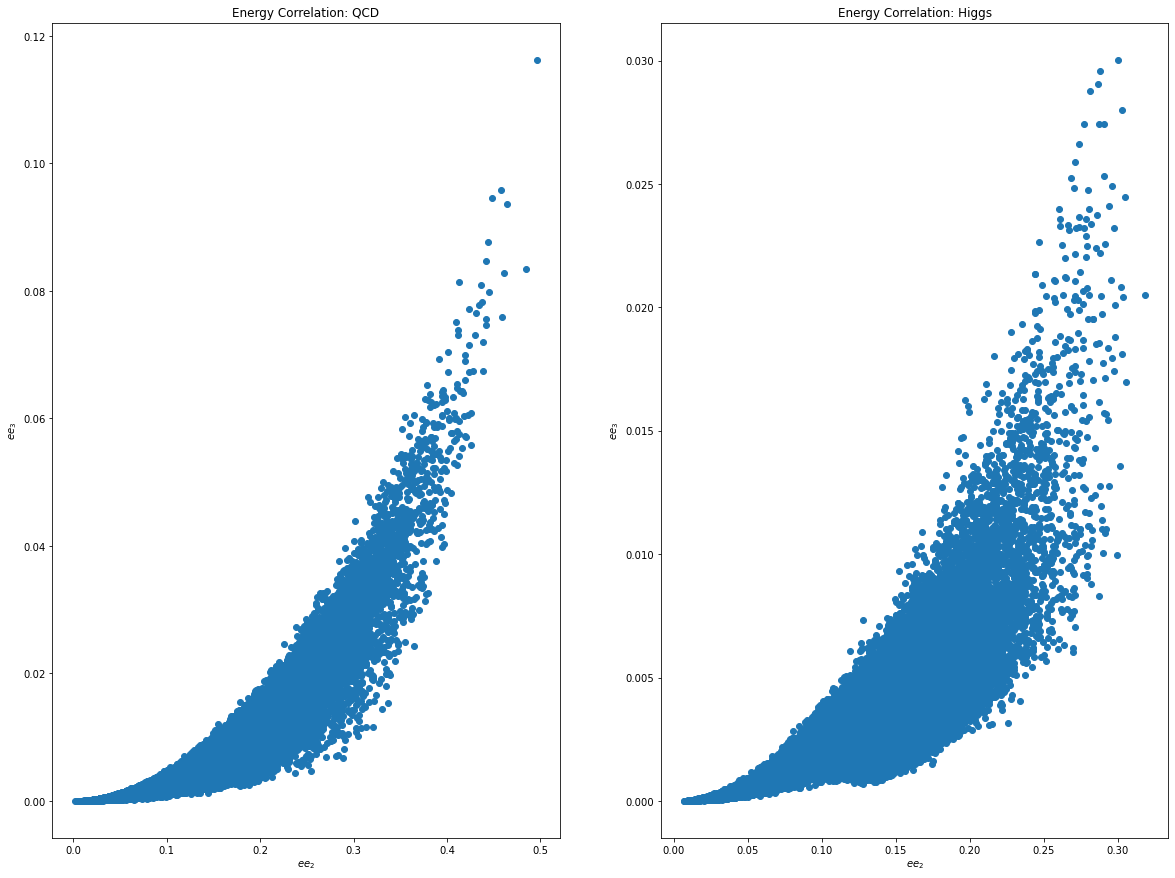

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(d_qcd['ee2'],d_qcd['ee3'])
ax2.scatter(d_higgs['ee2'],d_higgs['ee3'])
ax1.set_title('Energy Correlation: QCD')
ax2.set_title('Energy Correlation: Higgs')
ax1.set_xlabel('$ee_2$')
ax1.set_ylabel('$ee_3$')
ax2.set_xlabel('$ee_2$')
ax2.set_ylabel('$ee_3$')
plt.show()

The energy correlation coefficient is a unitless metric used to determine the "prongedness" of the jet i.e. if the collision is a multi-jet event. These values are not directly observable but are the results of calculations performed on directly observable features. Dijet and single jet events follow different curves when this metric is plotted in this manner as shown here:

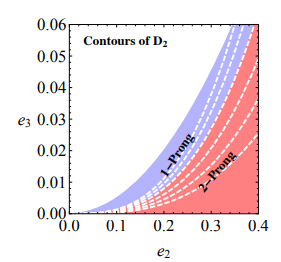

When $(e_2)^3$ >> $e_3$, this indicates the event resembles a two pronged jet. When $(e_2)^3$ << $e_3$ << $(e_2)^2$, this indicates the jet is single pronged. The $D_2$ feature is derived from energy correlation as $e_3/(e_2)^3$, and can be used to verify which condition (single prong or two prong) the energy correlation for an individual jet satisfies.

https://arxiv.org/pdf/1609.07483.pdf (page 5)

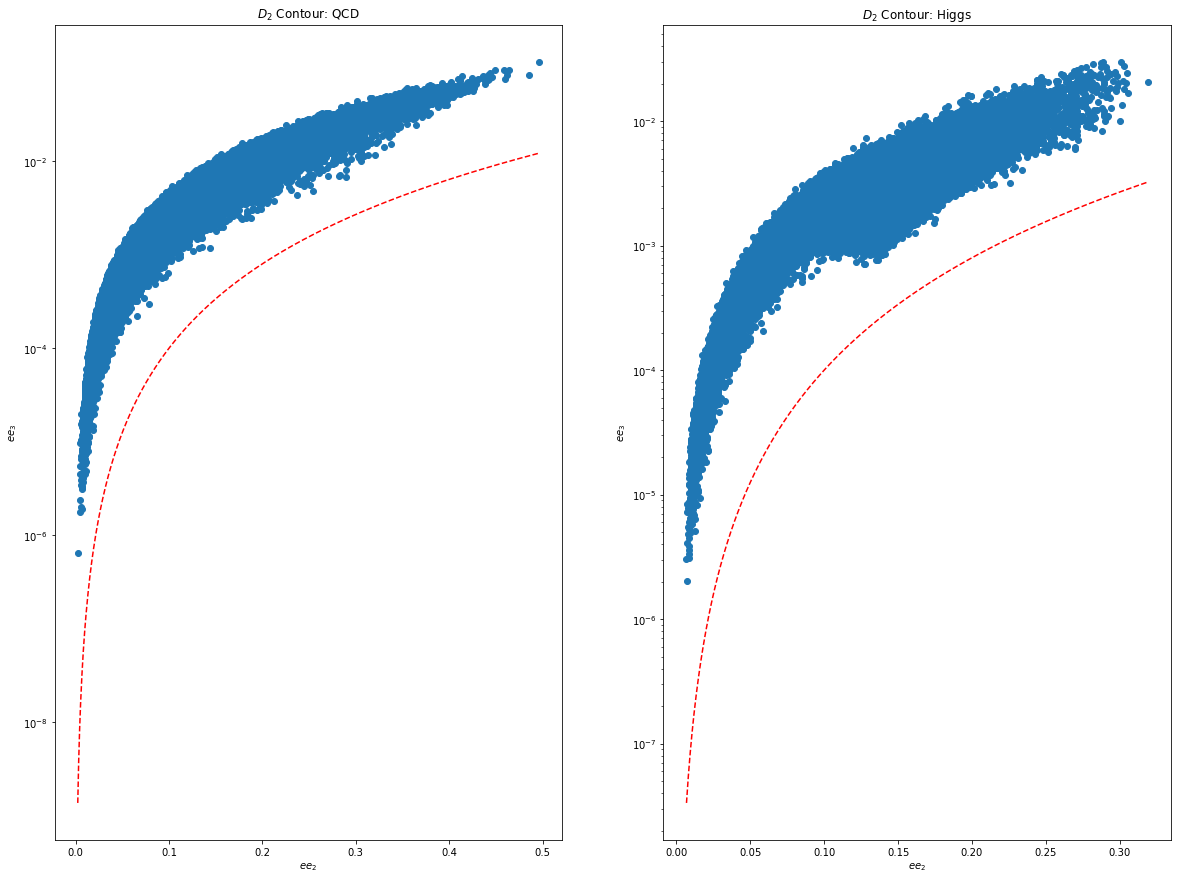

In [52]:
threshold = 0.1
qcd_contour = []
higgs_contour = []
qcd_x = np.linspace(min(d_qcd['ee2']),max(d_qcd['ee2']),1000)
higgs_x = np.linspace(min(d_higgs['ee2']),max(d_higgs['ee2']),1000)

for x in qcd_x:
    qcd_contour.append(threshold*(x**3))
for x in higgs_x:
    higgs_contour.append(threshold*(x**3))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(d_qcd['ee2'],d_qcd['ee3'])
ax1.plot(qcd_x, qcd_contour, 'r--')
ax2.scatter(d_higgs['ee2'],d_higgs['ee3'])
ax2.plot(higgs_x, higgs_contour, 'r--')
ax1.set_title('$D_2$ Contour: QCD')
ax2.set_title('$D_2$ Contour: Higgs')
ax1.set_xlabel('$ee_2$')
ax1.set_ylabel('$ee_3$')
ax2.set_xlabel('$ee_2$')
ax2.set_ylabel('$ee_3$')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

Unfortunately, even with a relatively low threshold of $(e_2)^3$ being 10x greater than $e_3$, it appears that every event in both the background and signal datasets is a single prong event so we won't be able to explicitly discriminate between signal and background by differentiating between single and multi jet events. However, $e_2$, $e_3$, and $D_2$ could still be useful metrics in pruning background data that does not appear at all similar to expected signal values since $e_2$ of Higgs is bound to a smaller region than QCD.

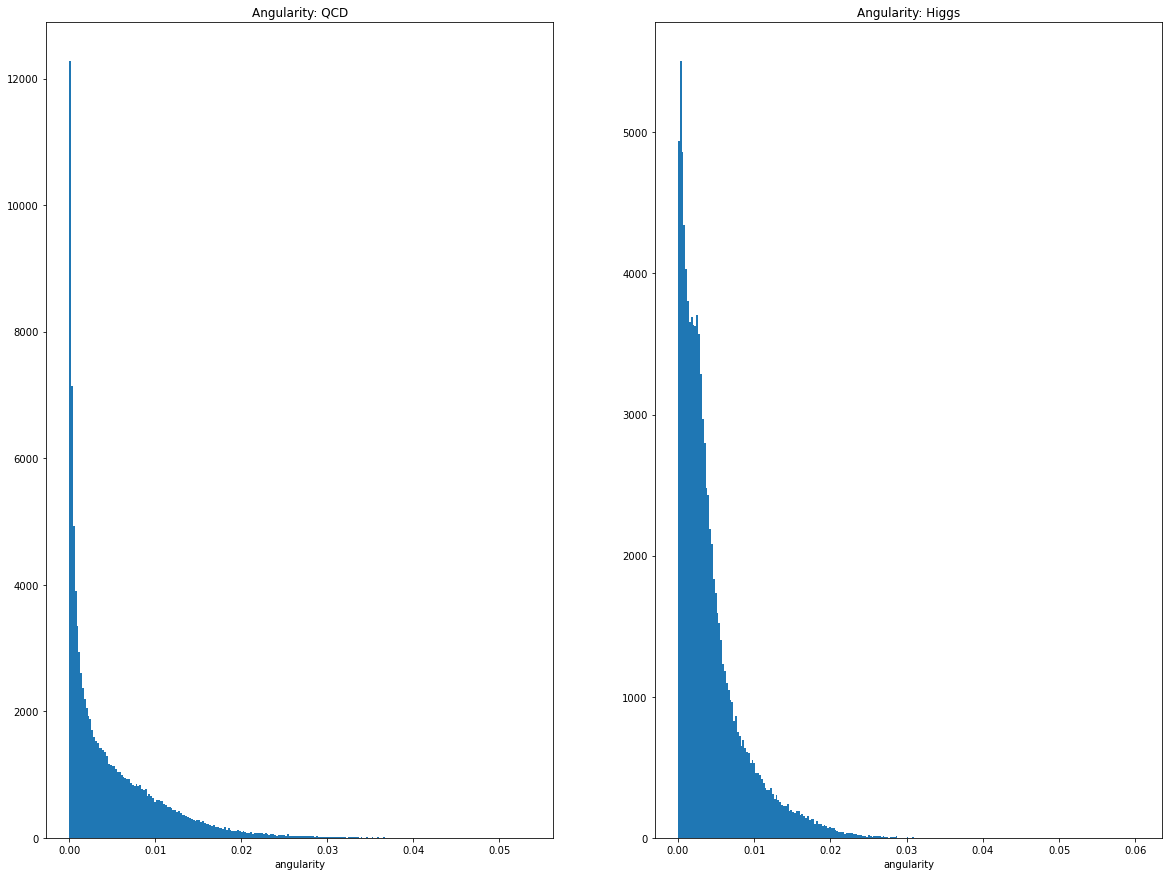

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['angularity'], 250)
ax2.hist(d_higgs['angularity'],250)
ax1.set_title('Angularity: QCD')
ax2.set_title('Angularity: Higgs')
ax1.set_xlabel('angularity')
ax2.set_xlabel('angularity')
plt.show()

Angularity is a measure of how evenly distributed the jet is throughout its radius. Values closer to zero indicate an even distribution of particles throughout the jet radius, while higher values indicate particles are tending towards the outer portion of the jet radius as indicated here:

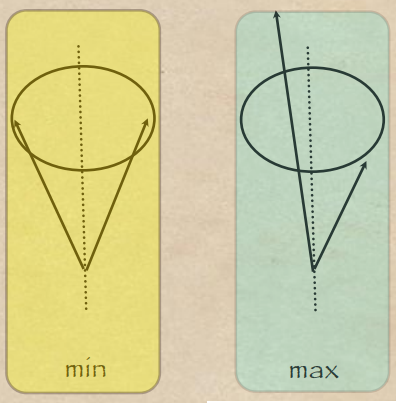

It seems that our background and signal are both highly likely to have low angularity, with the presence of some outliers. The width of the distribution within the Higgs dataset is slightly different however and could be exploited to improve discovery sensitivity.

https://indico.cern.ch/event/170556/contributions/1430595/attachments/211988/297161/pic2012_duchovni.pdf (slide 13)

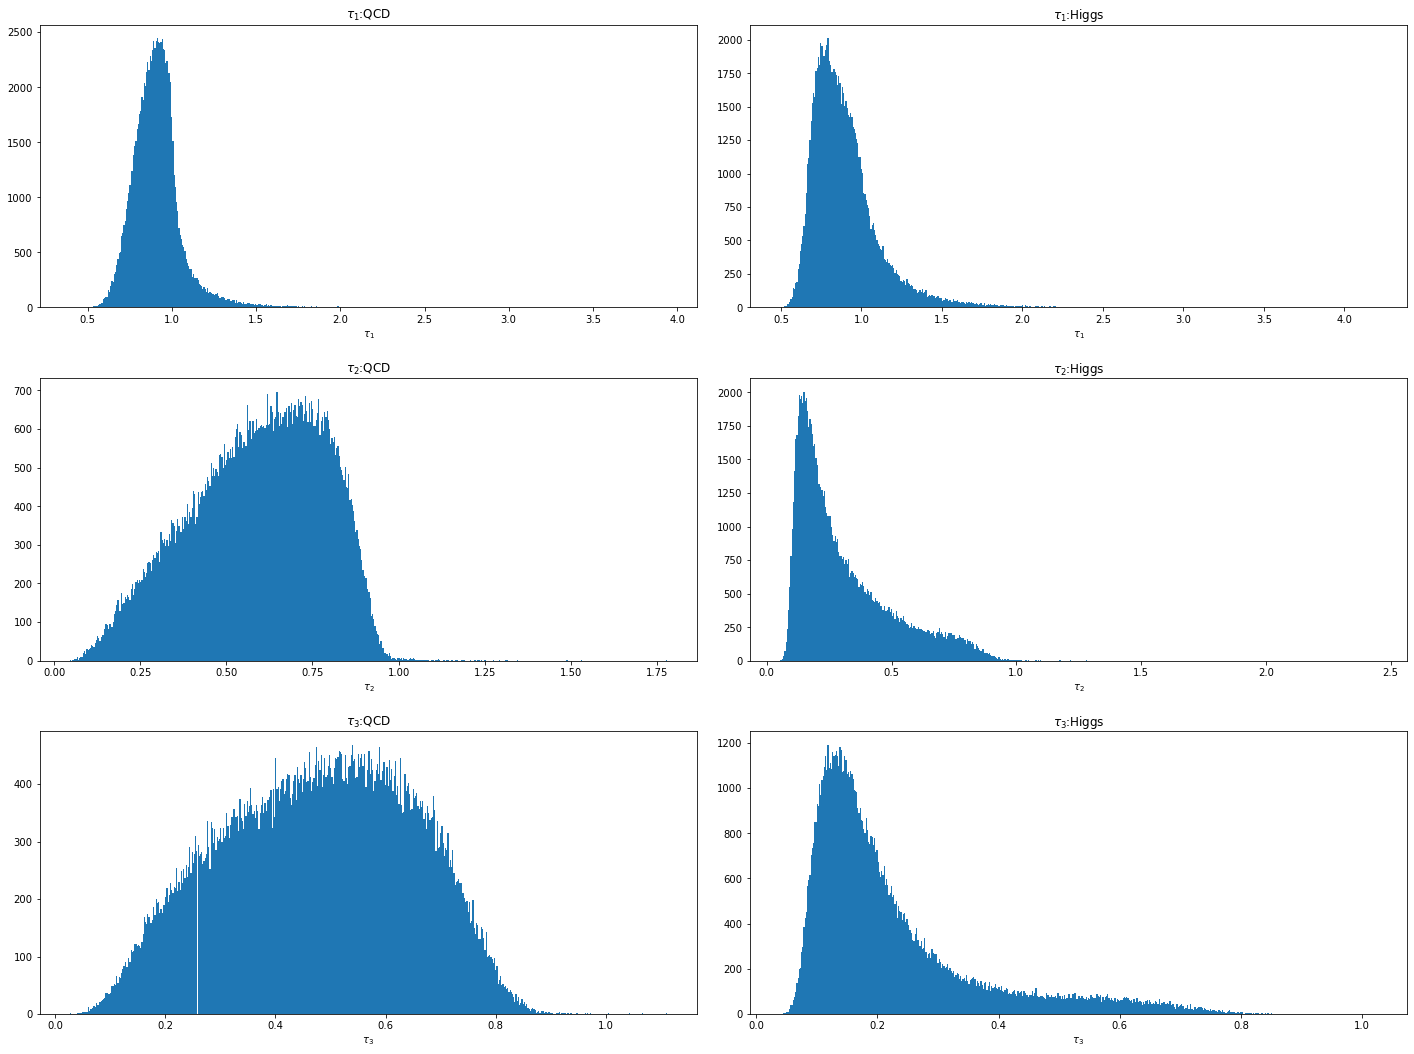

In [24]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
ax1.hist(d_qcd['t1'], 500)
ax2.hist(d_higgs['t1'],500)
ax3.hist(d_qcd['t2'],500)
ax4.hist(d_higgs['t2'],500)
ax5.hist(d_qcd['t3'],500)
ax6.hist(d_higgs['t3'],500)
ax1.set_title(r'$\tau_1$:QCD')
ax1.set_xlabel(r'$\tau_1$')
ax2.set_title(r'$\tau_1$:Higgs')
ax2.set_xlabel(r'$\tau_1$')
ax3.set_title(r'$\tau_2$:QCD')
ax3.set_xlabel(r'$\tau_2$')
ax4.set_title(r'$\tau_2$:Higgs')
ax4.set_xlabel(r'$\tau_2$')
ax5.set_title(r'$\tau_3$:QCD')
ax5.set_xlabel(r'$\tau_3$')
ax6.set_title(r'$\tau_3$:Higgs')
ax6.set_xlabel(r'$\tau_3$')
fig.tight_layout(pad=2)
plt.show()


The n-subjetiness observable depicted above is a measure of how well the particles of a jet fall into an n-pronged jet. This observable is calculated by taking the angle of each particle with respect to each sub-jet so the smallest n-subjetiness value for a jet indicates the jet most likely has n sub-jets, however an even better metric for this differentiation is the ratio between $\tau_2$ and $\tau_1$, $\tau_{21}$ and the ratio between $\tau_3$ and $\tau_2$, $\tau_{32}$.

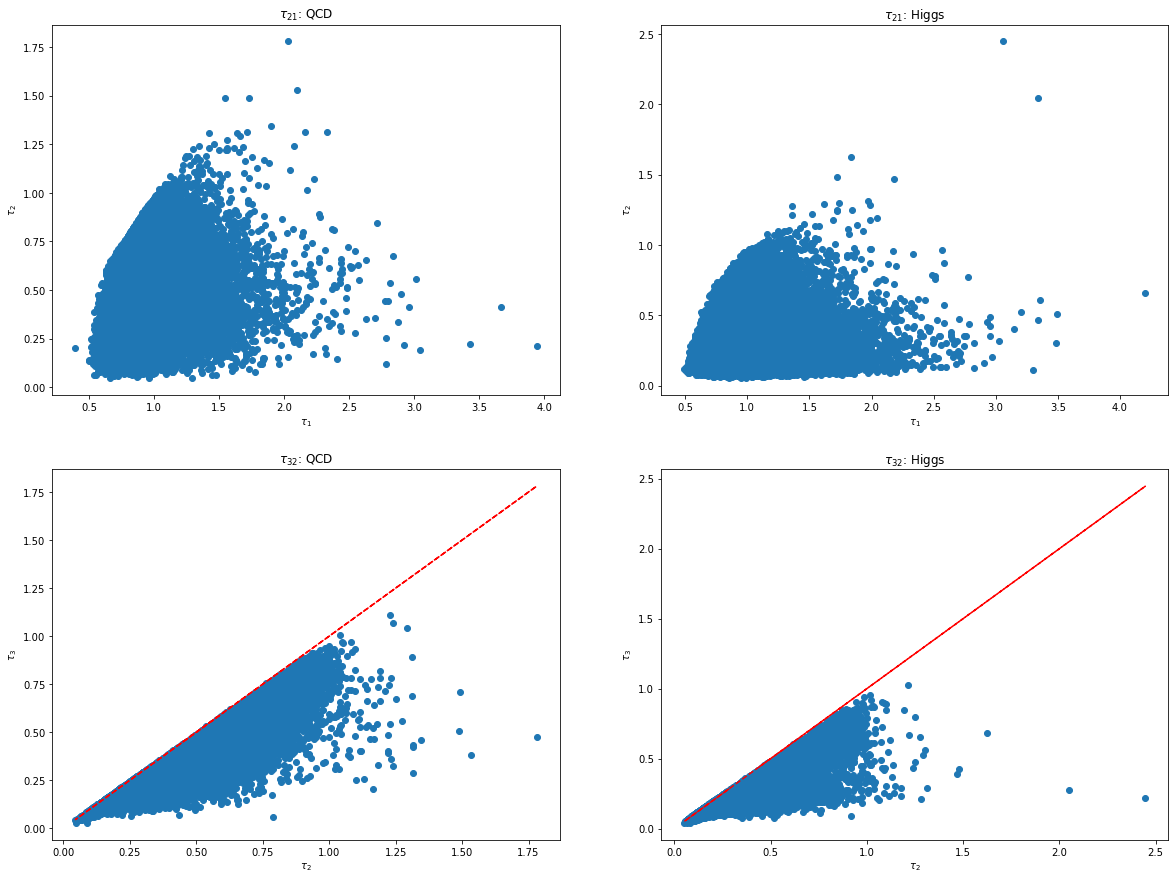

In [54]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.scatter(d_qcd['t1'],d_qcd['t2'])
ax2.scatter(d_higgs['t1'],d_higgs['t2'])
ax3.scatter(d_qcd['t2'],d_qcd['t3'])
ax4.scatter(d_higgs['t2'],d_higgs['t3'])
ax1.set_title(r'$\tau_{21}$: QCD')
ax2.set_title(r'$\tau_{21}$: Higgs')
ax3.set_title(r'$\tau_{32}$: QCD')
ax4.set_title(r'$\tau_{32}$: Higgs')
ax1.set_xlabel(r'$\tau_1$')
ax1.set_ylabel(r'$\tau_2$')
ax2.set_xlabel(r'$\tau_1$')
ax2.set_ylabel(r'$\tau_2$')
ax3.set_xlabel(r'$\tau_2$')
ax3.set_ylabel(r'$\tau_3$')
ax4.set_xlabel(r'$\tau_2$')
ax4.set_ylabel(r'$\tau_3$')
ax3.plot(d_qcd['t2'],d_qcd['t2'],'r--')
ax4.plot(d_higgs['t2'],d_higgs['t2'],'r--')
plt.show()

It appears from these plots that both types of jets are likely dijet events. The $\tau_{32}$ contour seems to follow where $\tau_{32} = 1$, indicating that $\tau_{2}$ is characteristically lower than $\tau_3$ in all events. As such, both QCD and Higgs events are likely dijet events in these particular simulations. This finding however is in contrast to what we determined using the energy correlation observables, so more work will need to be done to determine the cause of this discrepancy. Regardless, while the ratio between $\tau_{ij}$ may not necessarily be useful for discrimination, the raw $\tau$ values still distribute themselves in a distinct manner between QCD and Higgs data, so this would likely be a very useful asset for increasing discovery sensitivity.

https://arxiv.org/pdf/1609.07483.pdf

Text(0.5, 1.0, '$k_t{\\Delta}R$: Higgs')

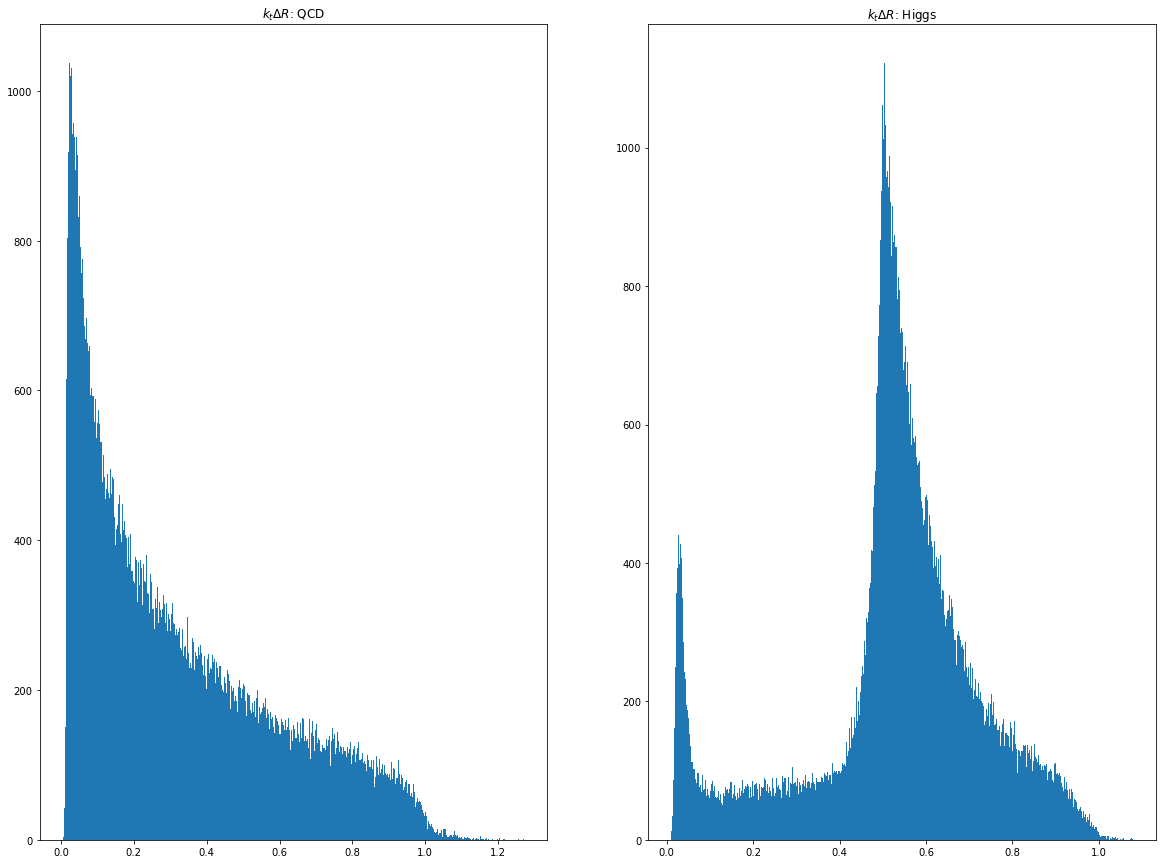

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(d_qcd['KtDeltaR'], 500)
ax2.hist(d_higgs['KtDeltaR'], 500)
ax1.set_title(r'$k_t{\Delta}R$: QCD')
ax2.set_title(r'$k_t{\Delta}R$: Higgs')

These are the plots for $k_t{\Delta}R$, after researching for a while, I think it might have something to do with a weighted "width" of the jet, though I'm not sure at all. Don't really have time to think about how this feature could be used.